In [207]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier

import warnings
warnings.filterwarnings('ignore')

In [208]:
dataset=pd.read_csv('diabetes.csv')

In [209]:
dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [210]:
dataset.keys()

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [211]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [212]:
dataset.describe().T


,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [213]:
dataset.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [214]:
np.unique(dataset['Outcome'])
dataset['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

<Axes: xlabel='Outcome', ylabel='count'>

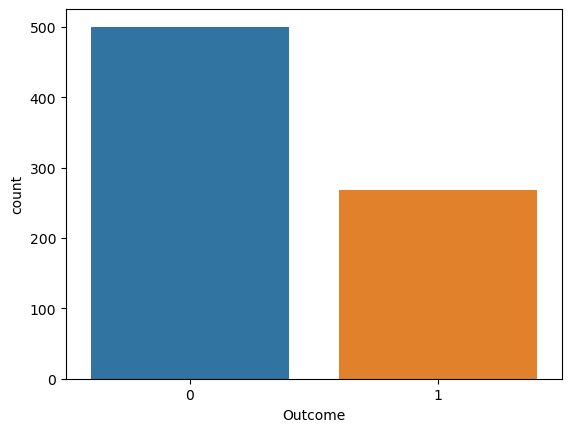

In [215]:
sns.countplot(data=dataset,x='Outcome')

(52,)

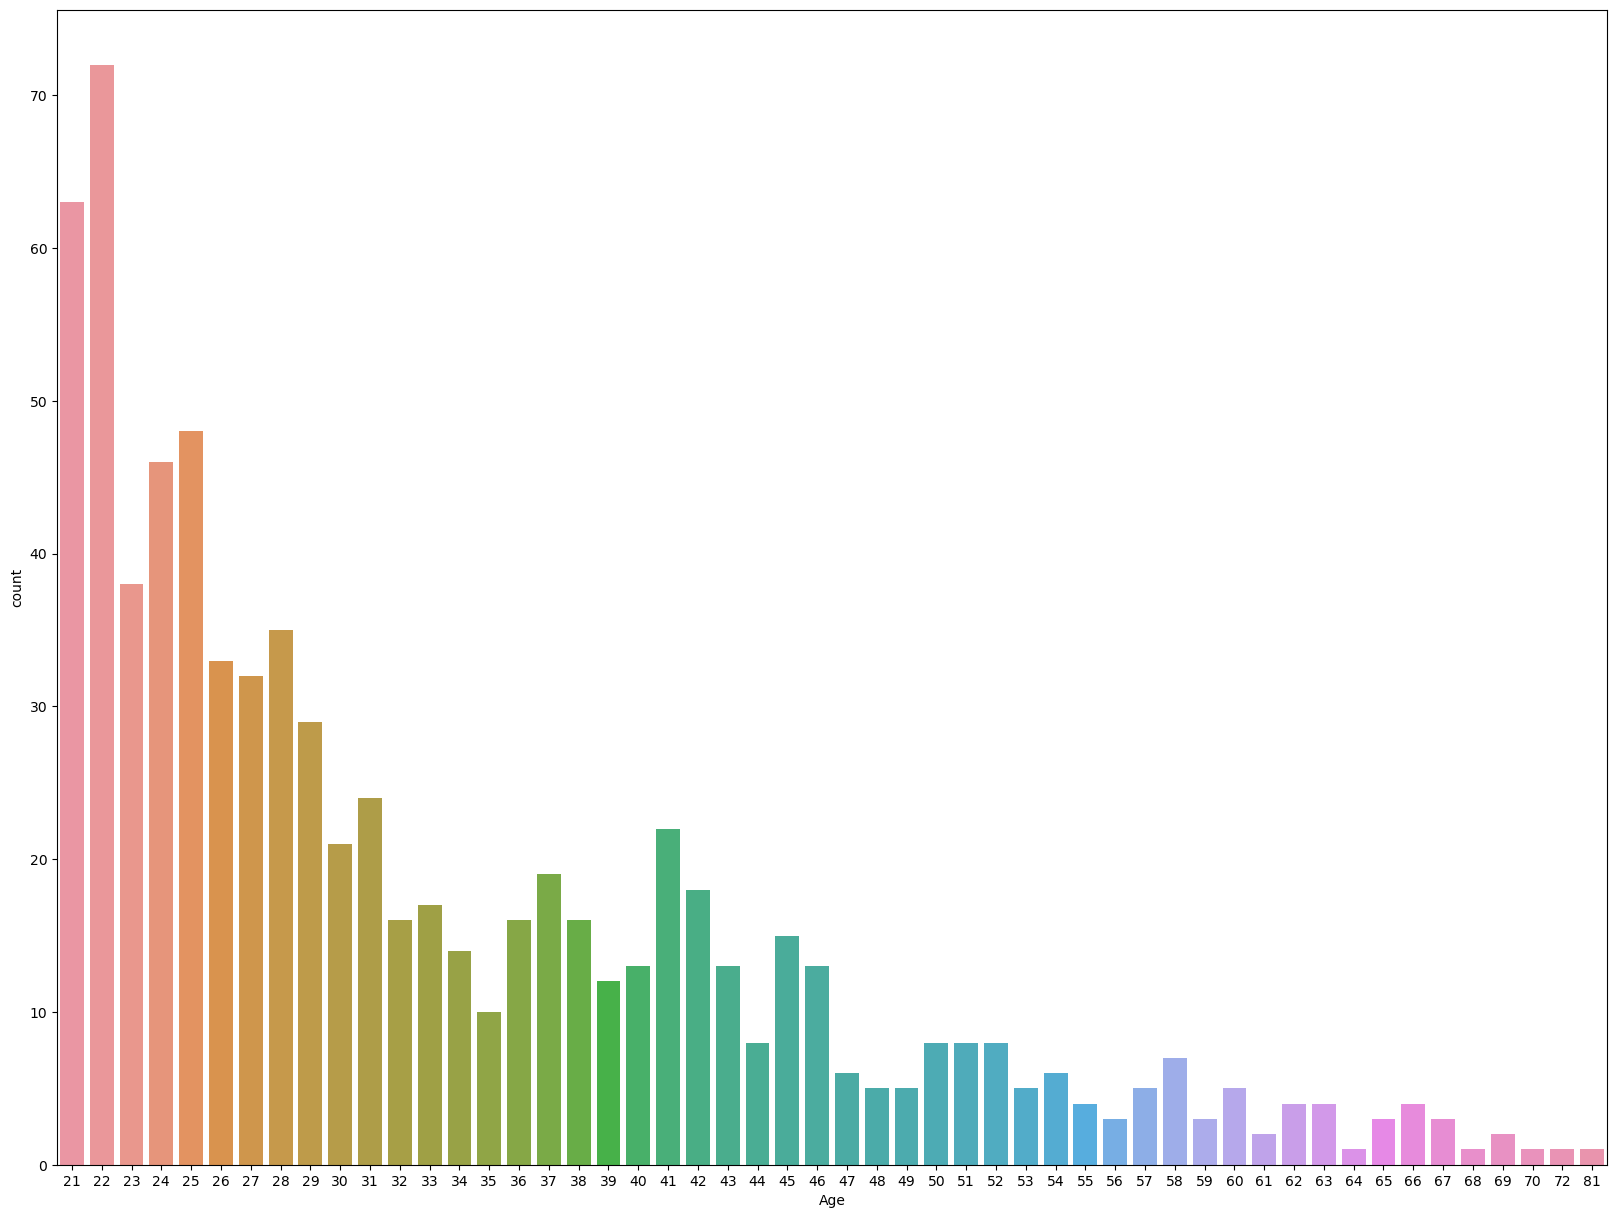

In [216]:
plt.subplots(figsize = (20, 15))
sns.countplot(data=dataset,x='Age')
dataset['Age'].value_counts()
np.unique(dataset['Age']).shape

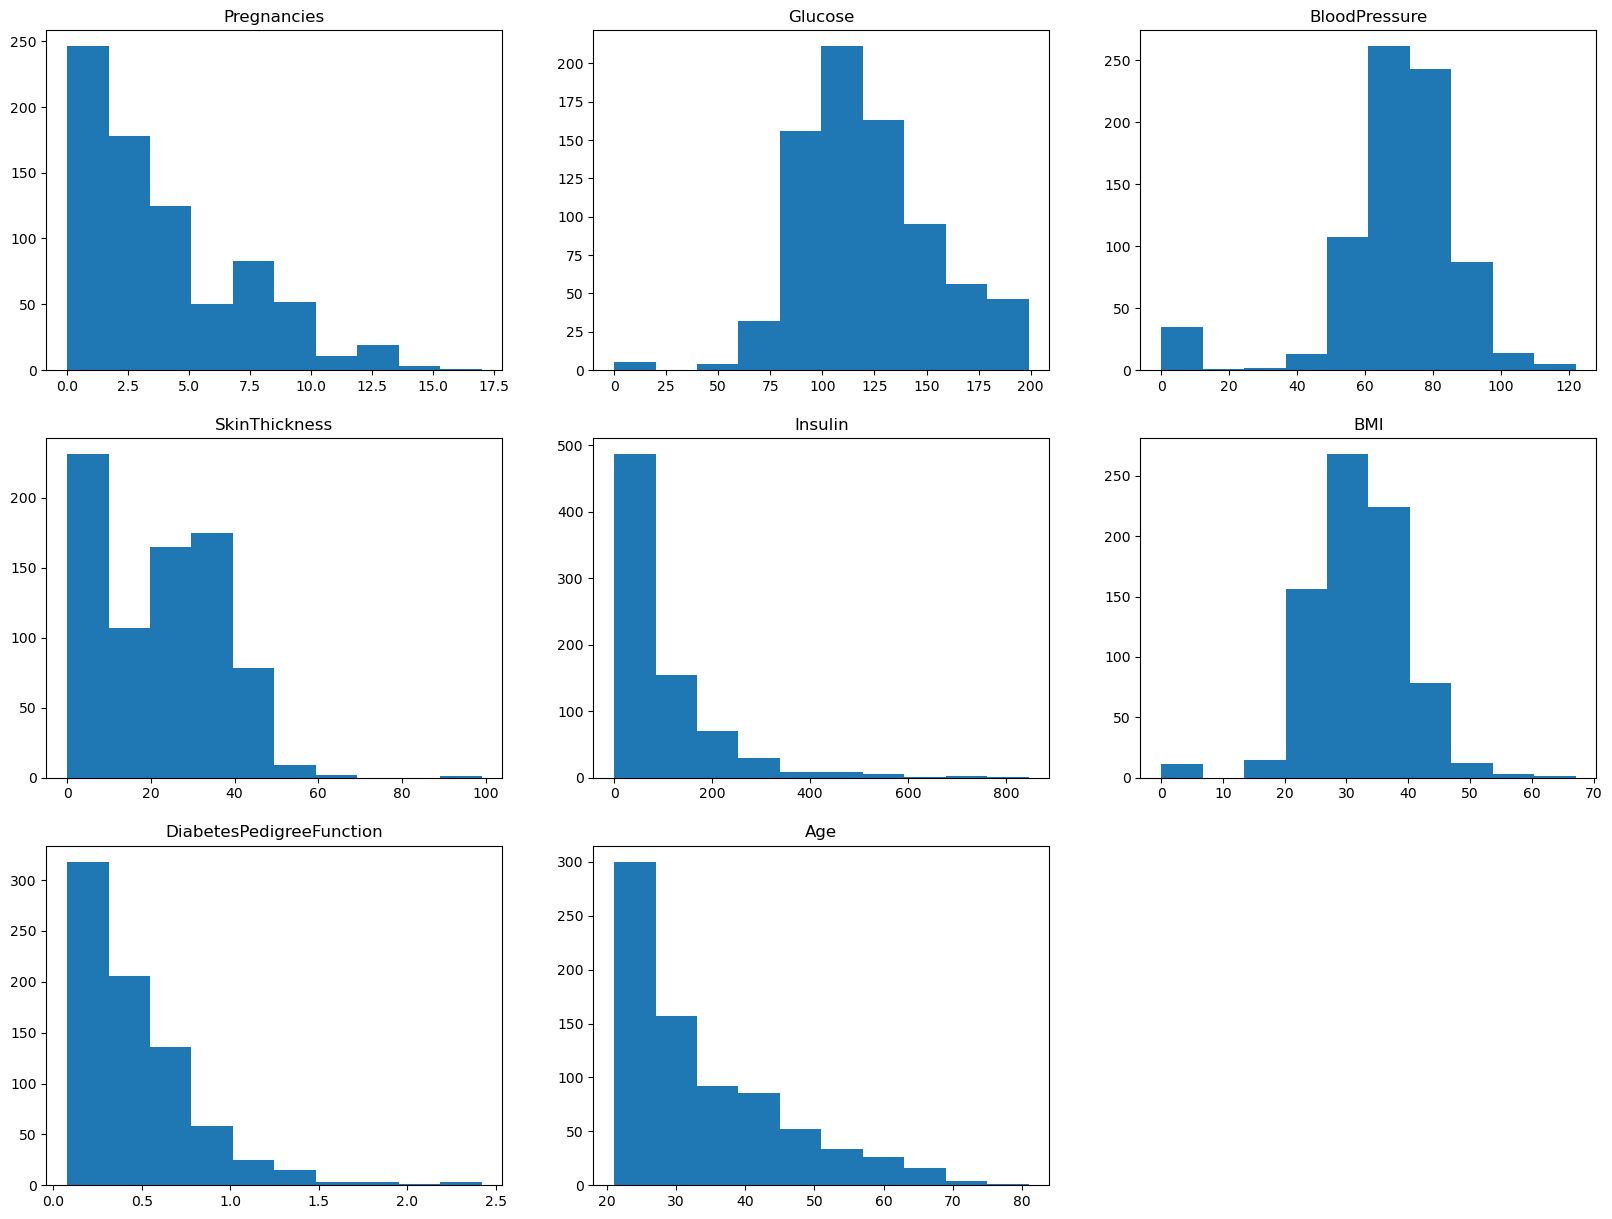

In [217]:
col=dataset.columns[:8]
plt.subplots(figsize = (20, 15))

for i ,j in zip(col,range(len(col))):
    plt.subplot(3,3,j+1)
    plt.hist(dataset[i])
    plt.title(i)
plt.show()

In [218]:
#sns.pairplot(data=dataset,hue='Outcome')

<Axes: >

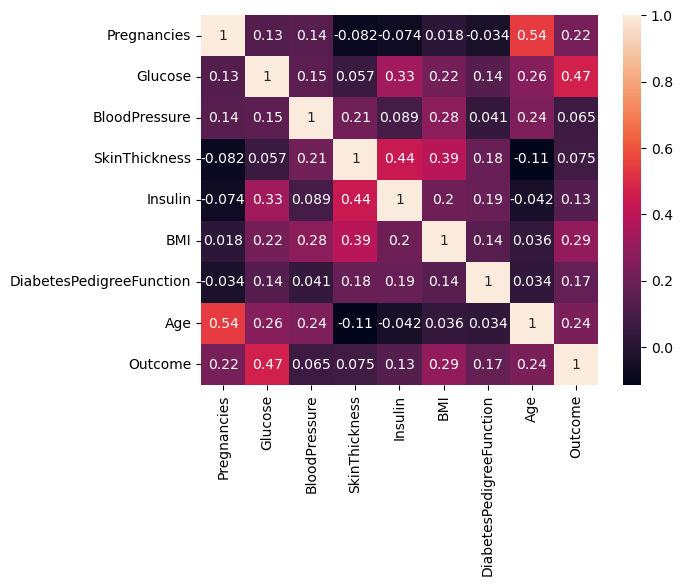

In [219]:
sns.heatmap(dataset.corr(),annot=True)

In [220]:

for col in dataset.columns:
    print(col,(dataset[col]==0).sum())
 


Pregnancies 111
Glucose 5
BloodPressure 35
SkinThickness 227
Insulin 374
BMI 11
DiabetesPedigreeFunction 0
Age 0
Outcome 500


In [221]:
new_dataset=dataset
new_dataset[["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]] = new_dataset[["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]].replace(0, np.NaN)

In [222]:
new_dataset.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [223]:
new_dataset["Glucose"].fillna(new_dataset["Glucose"].mean(), inplace = True)
new_dataset["BloodPressure"].fillna(new_dataset["BloodPressure"].mean(), inplace = True)
new_dataset["SkinThickness"].fillna(new_dataset["SkinThickness"].mean(), inplace = True)
new_dataset["Insulin"].fillna(new_dataset["Insulin"].mean(), inplace = True)
new_dataset["BMI"].fillna(new_dataset["BMI"].mean(), inplace = True)

In [224]:
new_dataset.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [225]:
scaler=MinMaxScaler(feature_range=(0,1))
sacled_dataset=scaler.fit_transform(new_dataset)
new_dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50,1
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31,0
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32,1
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.00000,180.000000,32.9,0.171,63,0
764,2,122.0,70.0,27.00000,155.548223,36.8,0.340,27,0
765,5,121.0,72.0,23.00000,112.000000,26.2,0.245,30,0
766,1,126.0,60.0,29.15342,155.548223,30.1,0.349,47,1


In [226]:
df=pd.DataFrame(sacled_dataset,columns=new_dataset.columns)

In [227]:
x=df.iloc[:,[1,4,5,7]].values
y=df.iloc[:,-1].values


In [228]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=1)

In [229]:
logs_model=LogisticRegression(verbose=True)

In [230]:
logs_model.fit(x_train,y_train,)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


LogisticRegression(verbose=True)

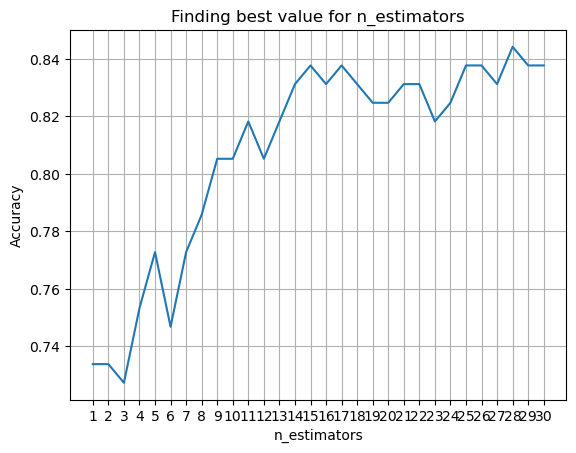

Highest value:  0.8441558441558441


In [231]:
acc=list()
x_axis=list(range(1,31))

for i in list(range(1,31)):
    knn_model=KNeighborsClassifier(n_neighbors=i)
    knn_model.fit(x_train,y_train)
    pred=knn_model.predict(x_test)
    acc.append(metrics.accuracy_score(pred,y_test))
plt.plot(x_axis, acc)
plt.xticks(range(1,31))
plt.title("Finding best value for n_estimators")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.grid()
plt.show()
print('Highest value: ',pd.Series(acc).values.max())


In [232]:
knn_model=KNeighborsClassifier(n_neighbors=28)
knn_model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=28)

In [233]:
p=knn_model.predict(x_test)
metrics.accuracy_score(y_test,p)

0.8441558441558441

In [234]:
tree=DecisionTreeClassifier()
tree.fit(x_train,y_train)

DecisionTreeClassifier()

In [235]:
tp=tree.predict(x_test)
metrics.accuracy_score(y_test,tp)

0.7142857142857143

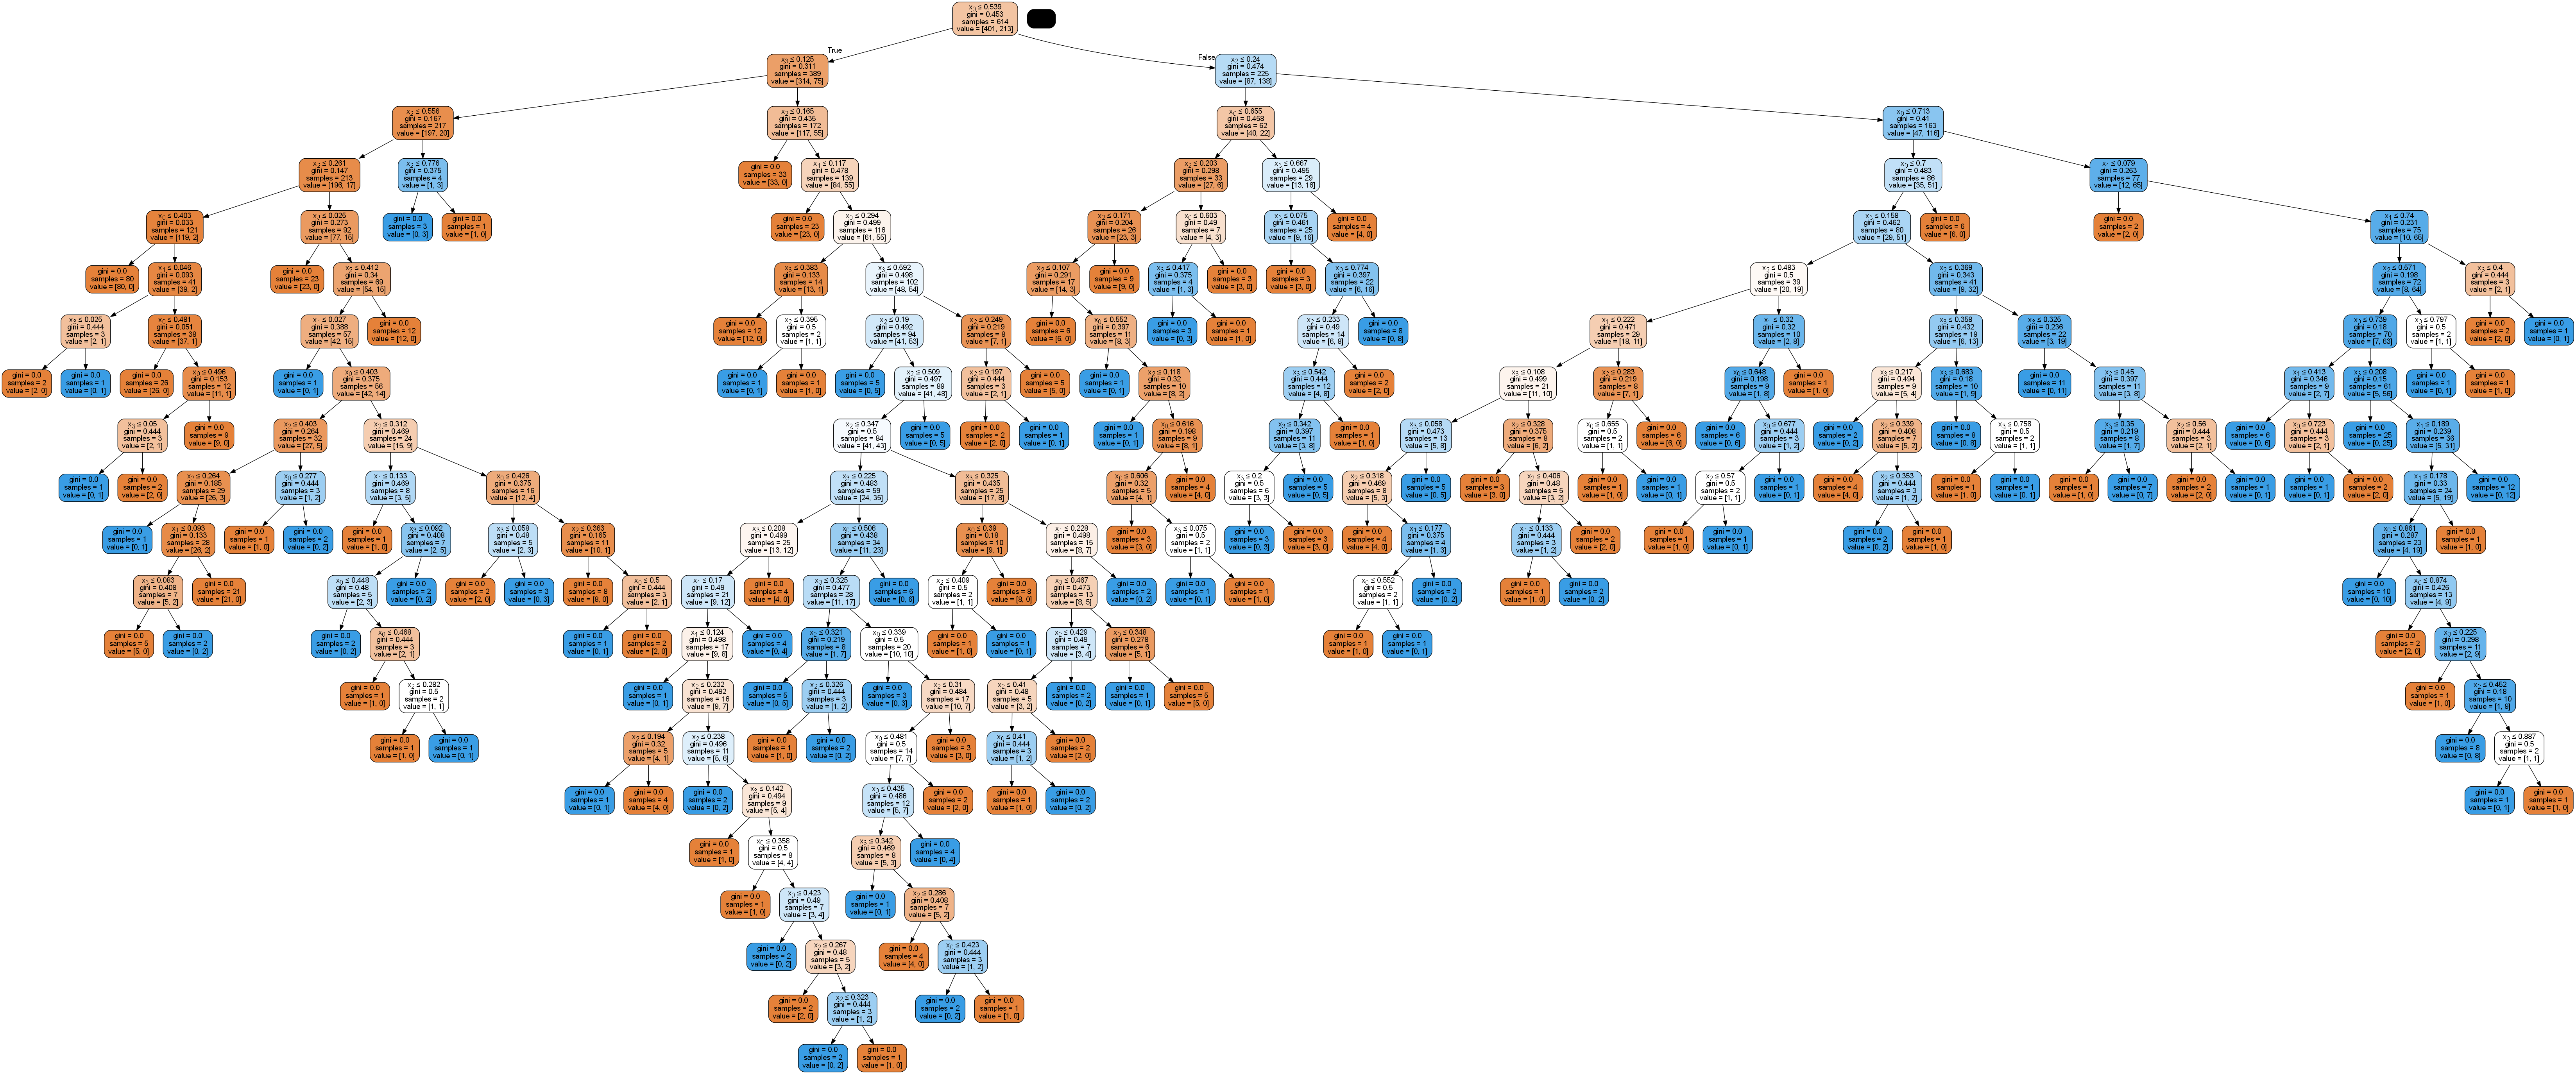

In [236]:
d_data=StringIO()
export_graphviz(tree,out_file=d_data,filled=True,rounded=True,special_characters=True)
g=pydotplus.graph_from_dot_data(d_data.getvalue())
Image(g.create_png())